In [16]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [7]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
# data = pd.read_sql_query('SELECT * FROM loan', engine)
# data.head()

In [85]:
query = '''
select f.film_id, f.rental_duration, f.rental_rate, f.length, f.replacement_cost, f.rating, c.name 
from film f

join film_category fc on
f.film_id = fc.film_id

join category c on
fc.category_id = c.category_id

where c.category_id <=4
group by film_id;'''

data = pd.read_sql_query(query, engine)
data.head()

,film_id,rental_duration,rental_rate,length,replacement_cost,rating,name
0,19,6,0.99,113,20.99,PG,Action
1,21,3,4.99,129,17.99,R,Action
2,29,5,2.99,168,11.99,NC-17,Action
3,38,6,0.99,68,25.99,NC-17,Action
4,56,6,2.99,129,15.99,G,Action


In [86]:
data.dtypes

film_id               int64
rental_duration       int64
rental_rate         float64
length                int64
replacement_cost    float64
rating               object
name                 object
dtype: object

In [87]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

In [88]:
#Label Encoding Name
X_cat['name'] = X_cat['name'].astype('category')
X_cat['name'] = X_cat['name'].cat.codes



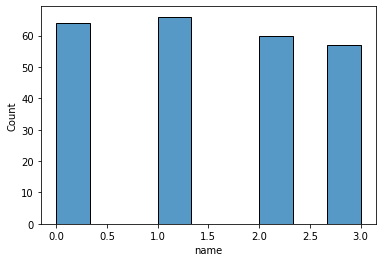

In [165]:
sns.histplot(Y)
plt.show()

In [89]:
#Label Encoding Rating
X_cat['rating'] = X_cat['rating'].astype('category')
X_cat['rating'] = X_cat['rating'].cat.codes

In [90]:
X_cat.head()

,rating,name
0,2,0
1,4,0
2,1,0
3,1,0
4,0,0


In [91]:
t1 = pd.concat([X_num,X_cat], axis=1)
t1.head()

,film_id,rental_duration,rental_rate,length,replacement_cost,rating,name
0,19,6,0.99,113,20.99,2,0
1,21,3,4.99,129,17.99,4,0
2,29,5,2.99,168,11.99,1,0
3,38,6,0.99,68,25.99,1,0
4,56,6,2.99,129,15.99,0,0


In [92]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
import numpy as np
X = data.select_dtypes(include = np.number)

# Normalizing data
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

In [93]:
Y = t1['name']
t1 = t1.drop(['name'], axis=1)

In [94]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(t1)
x_normalized = transformer.transform(t1)
print(x_normalized.shape)

(247, 6)


In [95]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(t1)
x_standardized = transformer.transform(t1)
print(x_standardized.shape)

(247, 6)


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

In [117]:
#Perform a Linear regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print

print("\nTest Results:\n")
print("\nMSE: %s\n" % mse)
print("\nRMSE: %s\n" % rmse)
print("\nR2: %s\n" % r2)
print("\nAdj. R2: %s\n" % adj_r2)


Test Results:


MSE: 1.311720419282785


RMSE: 1.1453036362828788


R2: -0.1397498399012267


Adj. R2: -0.18804432464280407



In [142]:
#Perform a Logistic Regression

from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [143]:
classification.score(X_test, y_test)

0.21333333333333335

In [144]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.21333333333333335

In [145]:
pd.Series(predictions).value_counts()

2    26
1    26
0    23
dtype: int64

In [170]:
y_test.value_counts()

1    21
0    20
3    19
2    15
Name: name, dtype: int64

In [158]:
from sklearn.metrics import confusion_matrix
matrix = pd.DataFrame(confusion_matrix(y_test, predictions))

In [141]:
X_train, X_test, y_train, y_test = train_test_split(x_standardized, Y, test_size=0.3, random_state=100)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(x_normalized, Y, test_size=0.4, random_state=100)

In [150]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)

ValueError: multiclass format is not supported

In [151]:
classification.predict_proba(X_test)

array([[0.26360283, 0.35748181, 0.20730603, 0.17160932],
       [0.17573921, 0.2427341 , 0.30603086, 0.27549584],
       [0.32844688, 0.23678005, 0.25545762, 0.17931546],
       [0.2196449 , 0.28281378, 0.25426009, 0.24328124],
       [0.31170768, 0.30899974, 0.19574941, 0.18354317],
       [0.31828019, 0.28104089, 0.2137296 , 0.18694931],
       [0.25109695, 0.28562808, 0.24159136, 0.22168362],
       [0.28037335, 0.27904174, 0.22753409, 0.21305082],
       [0.31787872, 0.19757239, 0.27427341, 0.21027548],
       [0.22427082, 0.32426692, 0.23959313, 0.21186913],
       [0.2006901 , 0.282668  , 0.27500953, 0.24163238],
       [0.22247174, 0.2686105 , 0.2743643 , 0.23455346],
       [0.26343242, 0.29144028, 0.24166167, 0.20346563],
       [0.28335726, 0.28423375, 0.23083516, 0.20157382],
       [0.27674995, 0.23300737, 0.2777918 , 0.21245088],
       [0.24534093, 0.23907793, 0.29732357, 0.21825758],
       [0.33928739, 0.3035896 , 0.18179132, 0.17533169],
       [0.23934879, 0.32700325,

In [153]:
from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2,3])
n_classes = 4

In [167]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0,

In [166]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression()

In [168]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [169]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.21333333333333335


In [171]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)


1    0.28
Name: name, dtype: float64

In [172]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 3 1 3 2 2 2 3 3 1 0 2 1 3 2 1 1 1 3 0 3 1 1 3]
False: [1 2 0 1 0 0 1 0 0 1 1 2 1 1 2 2 0 1 2 0 1 2 0 0 1]


In [173]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[6 7 7 0]
 [6 7 8 0]
 [6 6 3 0]
 [5 6 8 0]]


In [174]:
# print the first 25 true and predicted responses
print('True', y_test.values[0:25])
print('Pred', y_pred_class[0:25])

True [1 0 3 1 3 2 2 2 3 3 1 0 2 1 3 2 1 1 1 3 0 3 1 1 3]
Pred [1 2 0 1 0 0 1 0 0 1 1 2 1 1 2 2 0 1 2 0 1 2 0 0 1]


In [ ]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [175]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

NameError: name 'TP' is not defined